# Kokoon Data Science Mini-Project
## Lee Allison - 04/05/2020
---

**I'm using python 3.7 for this assessment**

## Task

* Predict the sales price for each house in the test set.

* Minimise the Root-Mean-Squared-Error (RMSE) metric between the logarithm of the predicted value and the logarithm of the observed sales price.

In [1]:
# makes Jupyter notebook wider
from IPython.display import display, HTML, clear_output
display(HTML(data="""
<style>
    div#notebook-container    { width: 99%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [2]:
# data handling & visualisation
import pandas as pd # v1.0.3
import numpy as np # v1.18.1

# v1.4.1
from scipy.stats import zscore
from scipy.stats import probplot
from scipy.stats import skew, kurtosis

import seaborn as sns # v0.10.0
import matplotlib.pyplot as plt #v3.1.3
from matplotlib.colors import LinearSegmentedColormap

# plot inside notebook
%matplotlib inline

In [3]:
# utilities
import os

def create_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [4]:
OUTPUT_DIR = './output'

---
## Exploratory Data Analysis

Start by doing some basic data exploring:
* View data frame head
* bulid a description of the data (using describe and data types)
* Look for missing data, and come up with a strategy for dealing with them

In [5]:
# load all data into dict
# so can loop over data easier
data = {}
data['train'] = pd.read_csv('./data/train.csv')
data['test']  = pd.read_csv('./data/test.csv')

In [6]:
def data_head(data):
    """ Check the head and number of rows of all data frames"""
    for data_name in data:
        # set to view head of all columns
        with pd.option_context('display.max_columns', data[data_name].shape[1]):
            display(data[data_name].head())
    
        print('{}: {:,} rows'.format(data_name, len(data[data_name])))
    
data_head(data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


train: 1,460 rows


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


test: 1,459 rows


In [7]:
def data_description(df, data_name='', save=False):
    """ """ 
    desc = df.describe(include='all').T
    desc['col_type'] = desc['mean'].apply(lambda x: 'Categorical' if np.isnan(x) else 'Numerical')
    desc['data_type'] = df.dtypes
    unique = []
    for idx in desc.index:
        unique.append(len(df[idx].unique()))

    desc['unique'] = unique
    
    if save:
        fname = '{}_description.csv'.format(data_name)
        create_directory(OUTPUT_DIR)
        fpath = os.path.join(OUTPUT_DIR, fname)
        desc.to_csv(fpath)
    
    return desc

# make description data frame
desc = data_description(data['train'], 'train')
display(desc.head())
display(desc['col_type'].value_counts())

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,col_type,data_type
Id,1460,1460,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460,Numerical,int64
MSSubClass,1460,15,NaN,NaN,56.8973,42.3006,20,20,50,70,190,Numerical,int64
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Categorical,object
LotFrontage,1201,111,NaN,NaN,70.05,24.2848,21,59,69,80,313,Numerical,float64
LotArea,1460,1073,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245,Numerical,int64


Categorical    43
Numerical      38
Name: col_type, dtype: int64

In [8]:
# Checking for numeric category columns (category = 1, 2, 3, ...)
display(desc[(desc['col_type'] == 'Numerical') & (desc['data_type'] == 'int64') & (desc['unique']/desc['count'] < 0.02)])

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,col_type,data_type
MSSubClass,1460,15,NaN,NaN,56.8973,42.3006,20,20,50,70,190,Numerical,int64
OverallQual,1460,10,NaN,NaN,6.09932,1.383,1,5,6,7,10,Numerical,int64
OverallCond,1460,9,NaN,NaN,5.57534,1.1128,1,5,5,6,9,Numerical,int64
LowQualFinSF,1460,24,NaN,NaN,5.84452,48.6231,0,0,0,0,572,Numerical,int64
BsmtFullBath,1460,4,NaN,NaN,0.425342,0.518911,0,0,0,1,3,Numerical,int64
BsmtHalfBath,1460,3,NaN,NaN,0.0575342,0.238753,0,0,0,0,2,Numerical,int64
FullBath,1460,4,NaN,NaN,1.56507,0.550916,0,1,2,2,3,Numerical,int64
HalfBath,1460,3,NaN,NaN,0.382877,0.502885,0,0,0,1,2,Numerical,int64
BedroomAbvGr,1460,8,NaN,NaN,2.86644,0.815778,0,2,3,3,8,Numerical,int64
KitchenAbvGr,1460,4,NaN,NaN,1.04658,0.220338,0,1,1,1,3,Numerical,int64


In [9]:
# convert MSSubClass into a category, after check data_description.txt
data['train']['MSSubClass'] = data['train']['MSSubClass'].astype(str)
data['test']['MSSubClass'] = data['test']['MSSubClass'].astype(str)

# make a copy train use later
data['train_copy'] = data['train']

# update description data frame
desc = data_description(data['train'], 'train')

In [10]:
def missing_data(df, desc):
    """ Returns the number of missing_df data point in each column and their percentage of the total
    """
    missing_df = df.isnull().sum()
    missing_df = missing_df[missing_df > 0].sort_values(ascending=False)
    missing_df = missing_df.to_frame(name='missing')
    missing_df['percent'] = missing_df['missing'] / len(df)

    print('data has {:,} columns with missing data'.format(len(missing_df)))
    
    missing_df = missing_df.join(desc[['col_type','data_type']])
    
    return missing_df

missing_df = missing_data(data['train'], desc)
display(missing_df)

data has 19 columns with missing data


,missing,percent,col_type,data_type
PoolQC,1453,0.995205,Categorical,object
MiscFeature,1406,0.963014,Categorical,object
Alley,1369,0.937671,Categorical,object
Fence,1179,0.807534,Categorical,object
FireplaceQu,690,0.472603,Categorical,object
LotFrontage,259,0.177397,Numerical,float64
GarageYrBlt,81,0.055479,Numerical,float64
GarageType,81,0.055479,Categorical,object
GarageFinish,81,0.055479,Categorical,object
GarageQual,81,0.055479,Categorical,object


In [11]:
# check LotFrontage
display(data['train'][data['train']['LotFrontage'].isnull()].head())
display(data['train'][~data['train']['LotFrontage'].isnull()].head())

# 'LotFrontage' mean
round(np.mean(data['train']['LotFrontage']))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


70

Most of the missing data is categorical, which could mean that the available category doesn't make sense for the given property. Also there are groups within the missing data data, features with the prefix **Garage, Bsmt, Mas**. After check the data_description.txt, categories were left blank when it was N/A. The blank category for **Garage, Mas** seem to be paired with the missing numerical views.

In [12]:
def fill_missing(df, missing_df, fill_mean=[]):
    """ """
    # fill Numerical paired with categorical data with 0
    # else fill with columns mean
    cols = missing_df[missing_df['col_type'] == 'Numerical'].index
    for col in cols:
        if col not in fill_mean:
            df[col] = df[col].fillna(0)
        else:
            mean = round(np.mean(df[col]))
            df[col] = df[col].fillna(mean)

    # fill Categorical missing with 'None'
    cols = missing_df[missing_df['col_type'] == 'Categorical'].index
    for col in cols:
        df[col] = df[col].fillna('None')
        
fill_missing(data['train'], missing_df, ['LotFrontage'])

In [13]:
missing_df = missing_data(data['train'], desc)

data has 0 columns with missing data


### Viewing variables

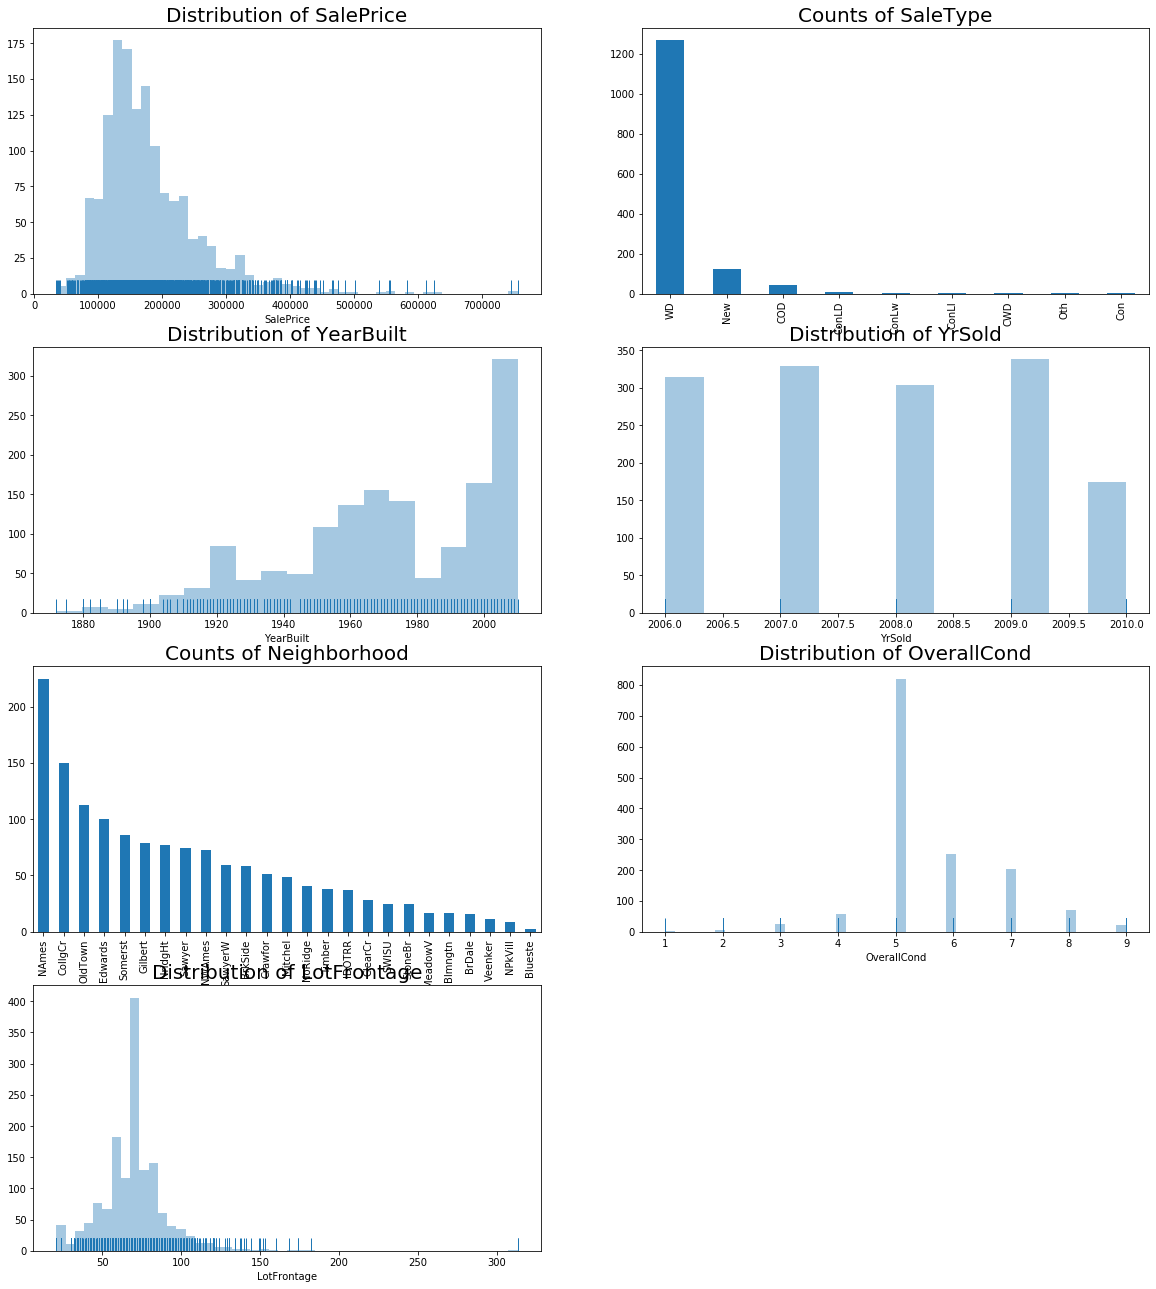

In [14]:
def plot_df_features(x, save_plot=False):
    """ """
    if isinstance(x, pd.DataFrame):
        cols = x.columns
        df = x
    else:
        cols = [x.name]
        df = x.to_frame()
    
    h = len(cols) / 2 + (len(cols) % 2 > 0)
    fig = plt.figure(figsize=(20, 5*h))
    
    img_idx = 1
    for col in cols:
    
        ax = fig.add_subplot(h, 2, img_idx) 

        try:
            sns.distplot(df[col], kde=False, rug=True, ax=ax)
            ax.set_title('Distribution of {}'.format(col), fontsize=20)
        except:
            df[col].value_counts().plot(ax=ax, kind='bar')
            ax.set_title('Counts of {}'.format(col), fontsize=20)

        img_idx += 1
    
    # show and save
    if save_plot:
        fname = 'plot_features.png'.format(col)
        create_directory(OUTPUT_DIR)
        fpath = os.path.join(OUTPUT_DIR, fname)
        plt.savefig(fpath)
    
    plt.show()
        
plot_df_features(data['train'][['SalePrice', 'SaleType', 'YearBuilt', 'YrSold', 'Neighborhood', 'OverallCond', 'LotFrontage']])

### Outliers

Common ways to find outlier are:
* Use a multiple (commonly 1.5) of the interquartile range (Q3 - Q1)
* Use values with Z-scores (commonly greater than 3.0 or 3.5)

I'm going to check using the z-score method

In [15]:
def z_score_outliers(arr, threshold=3.5):
    """ """
    zscores = zscore(arr)

    outliers = {}
    
    below = zscores < -threshold
    outliers['below'] = sorted(zip(arr[below], zscores[below]))

    above = zscores > threshold 
    outliers['above'] = sorted(zip(arr[above], zscores[above]))

    return outliers

In [16]:
for col in desc[desc['col_type'] == 'Numerical'].index:
    print(col)
    
    outliers = z_score_outliers(data['train'][col], threshold=4.)
    
    if len(outliers['below']) > 0:
        print('below negative z-scores outlier: {:,}'.format(len(outliers['below'])))
        print(outliers['below'])
    
    if len(outliers['above']) > 0:
        print('above postive z-scores outlier: {:,}'.format(len(outliers['above'])))
        print(outliers['above'])
        
    print('--------------------------------------------------')

Id
--------------------------------------------------
LotFrontage
above postive z-scores outlier: 7
[(160.0, 4.085978989955834), (168.0, 4.449343042054845), (174.0, 4.721866081129103), (174.0, 4.721866081129103), (182.0, 5.085230133228114), (313.0, 11.035316486349423), (313.0, 11.035316486349423)]
--------------------------------------------------
LotArea
above postive z-scores outlier: 10
[(53107, 4.268473523013462), (53227, 4.280500166713095), (53504, 4.308261669253082), (57200, 4.678682295201794), (63887, 5.34886701536387), (70761, 6.037793255291208), (115149, 10.486448759785635), (159000, 14.881285033724204), (164660, 15.448541728223583), (215245, 20.51827315777325)]
--------------------------------------------------
OverallQual
--------------------------------------------------
OverallCond
below negative z-scores outlier: 1
[(1, -4.112969893342749)]
--------------------------------------------------
YearBuilt
--------------------------------------------------
YearRemodAdd
--------

In [17]:
# to keep it simple only filtering clear outliers 
outlier_filter_upper = {
    'LotFrontage': 310,
    'LotArea': 100000,
    'BsmtFinSF1': 5600,
    'BsmtFinSF2': 1400,
    'TotalBsmtSF': 4000,
    '1stFlrSF': 4000,
    'LowQualFinSF': 300,
    'BsmtHalfBath': 2,
    '3SsnPorch': 200,
    'PoolArea': 480,
    'SalePrice': 600000  
}

def remove_outliers(df, outlier_filter, upper=True):
    """ """
    print('Before: {:,}'.format(len(df)))
    for col, val in outlier_filter.items():
        if upper:
            df = df[df[col] < val]
        else:
            df = df[df[col] > val]
        
        print('After {}: {:,}'.format(col, len(df)))
        
    return df

data['train'] = remove_outliers(data['train'], outlier_filter_upper)
data['train'].shape

Before: 1,460
After LotFrontage: 1,458
After LotArea: 1,454
After BsmtFinSF1: 1,454
After BsmtFinSF2: 1,453
After TotalBsmtSF: 1,453
After 1stFlrSF: 1,453
After LowQualFinSF: 1,437
After BsmtHalfBath: 1,435
After 3SsnPorch: 1,426
After PoolArea: 1,421
After SalePrice: 1,418


(1418, 81)

### Correlation

Looking for correlated variables, which leads to multicollinearity (2+ variables can be linearly predicted from the other). And multicollinearity affect the way the regression model works.

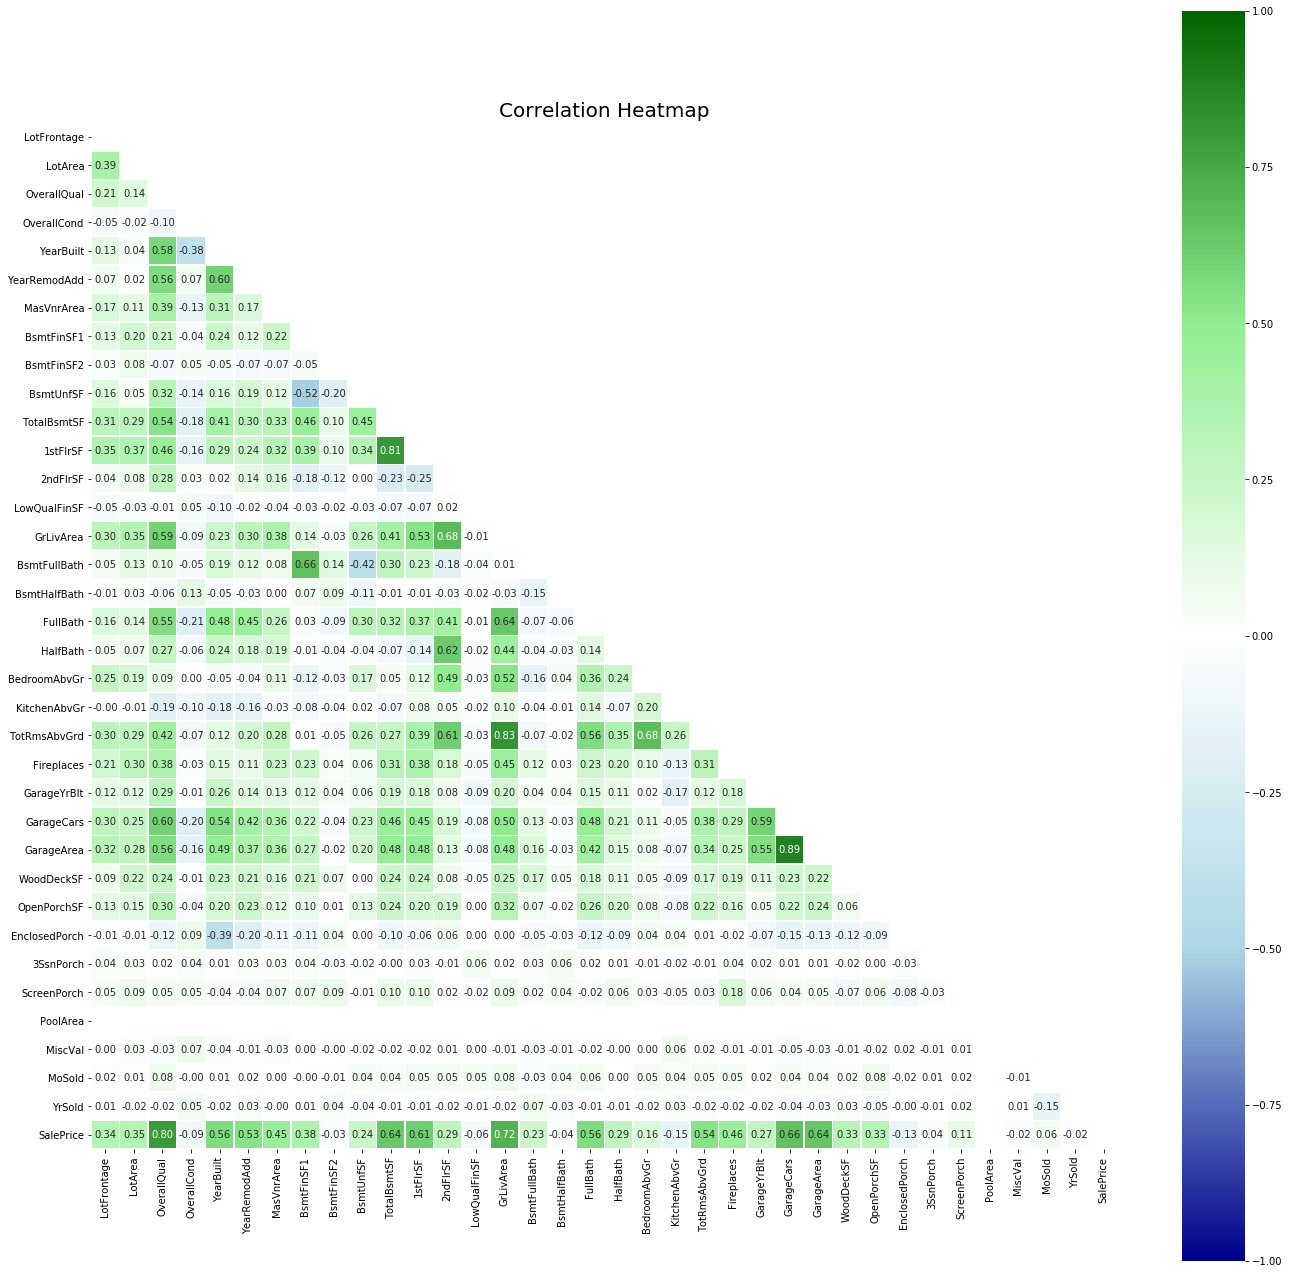

In [18]:
def correlation_heatmap(df, save_plot=False):
    """ Plots a heatmap of all the correlation of a data frame
    """
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
    
    # Figure and colourmap
    fig = plt.figure(figsize=(23, 23))
    ax = fig.add_subplot(1,1,1) 

    cmap = LinearSegmentedColormap.from_list(
        name='corr_heat', 
        colors=['darkblue','lightblue','white', 'lightgreen','darkgreen']
    )

    ax.set_title('Correlation Heatmap', fontsize=20)

    # Draw the heatmap with the annotations
    sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, cbar=True, 
                square=True, linewidths=.5, annot=True, fmt='.2f')

    # show and save
    plt.show()
    if save_plot:
        fname = 'correlation_heatmap.png'
        create_directory(OUTPUT_DIR)
        fpath = os.path.join(OUTPUT_DIR, fname)
        plt.savefig(fpath)
    
correlation_heatmap(data['train'].drop(['Id'], axis=1))

At a glance it can be seen that there is a high correlation between:

* OverallQual & SalePrice
* TotalBsmtSF & 1stFlrSF
* GrLivArea   & TotRmsAbvGrd
* GarageCars  & GarageArea

Which when you think about it make sense, as these pairs are the same information just using different method of measuring it

---
## Regression

In [19]:
import time
import itertools

# sklearn v0.22.1
# Loading testing, tuning & scoring
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# sklearn model type
from sklearn.linear_model import ElasticNet

### Normality

Check normality, as a number of models assume that the data follows a normal distributed, and it helps avoid issue when fitting the regression model.

Can be done by using a statistical test or checking shape of the distribution:

* **Skewness and Kurtosis Test** - check if |Skewness| > 0.8 or |Kurtosis| > 3.0  of the distribution

In [20]:
def skewness_kurtosis_test(x, skew_val=0.8, kurt_val=3.0):
    """ Simple test to check if the data has high skewness or kurtosis
    """
    high_skewness = abs(skew(x)) > skew_val
    high_kurtosis = abs(kurtosis(x)) > kurt_val
    
    return high_skewness, high_kurtosis

Features found with high skewness or kurtosis: 18


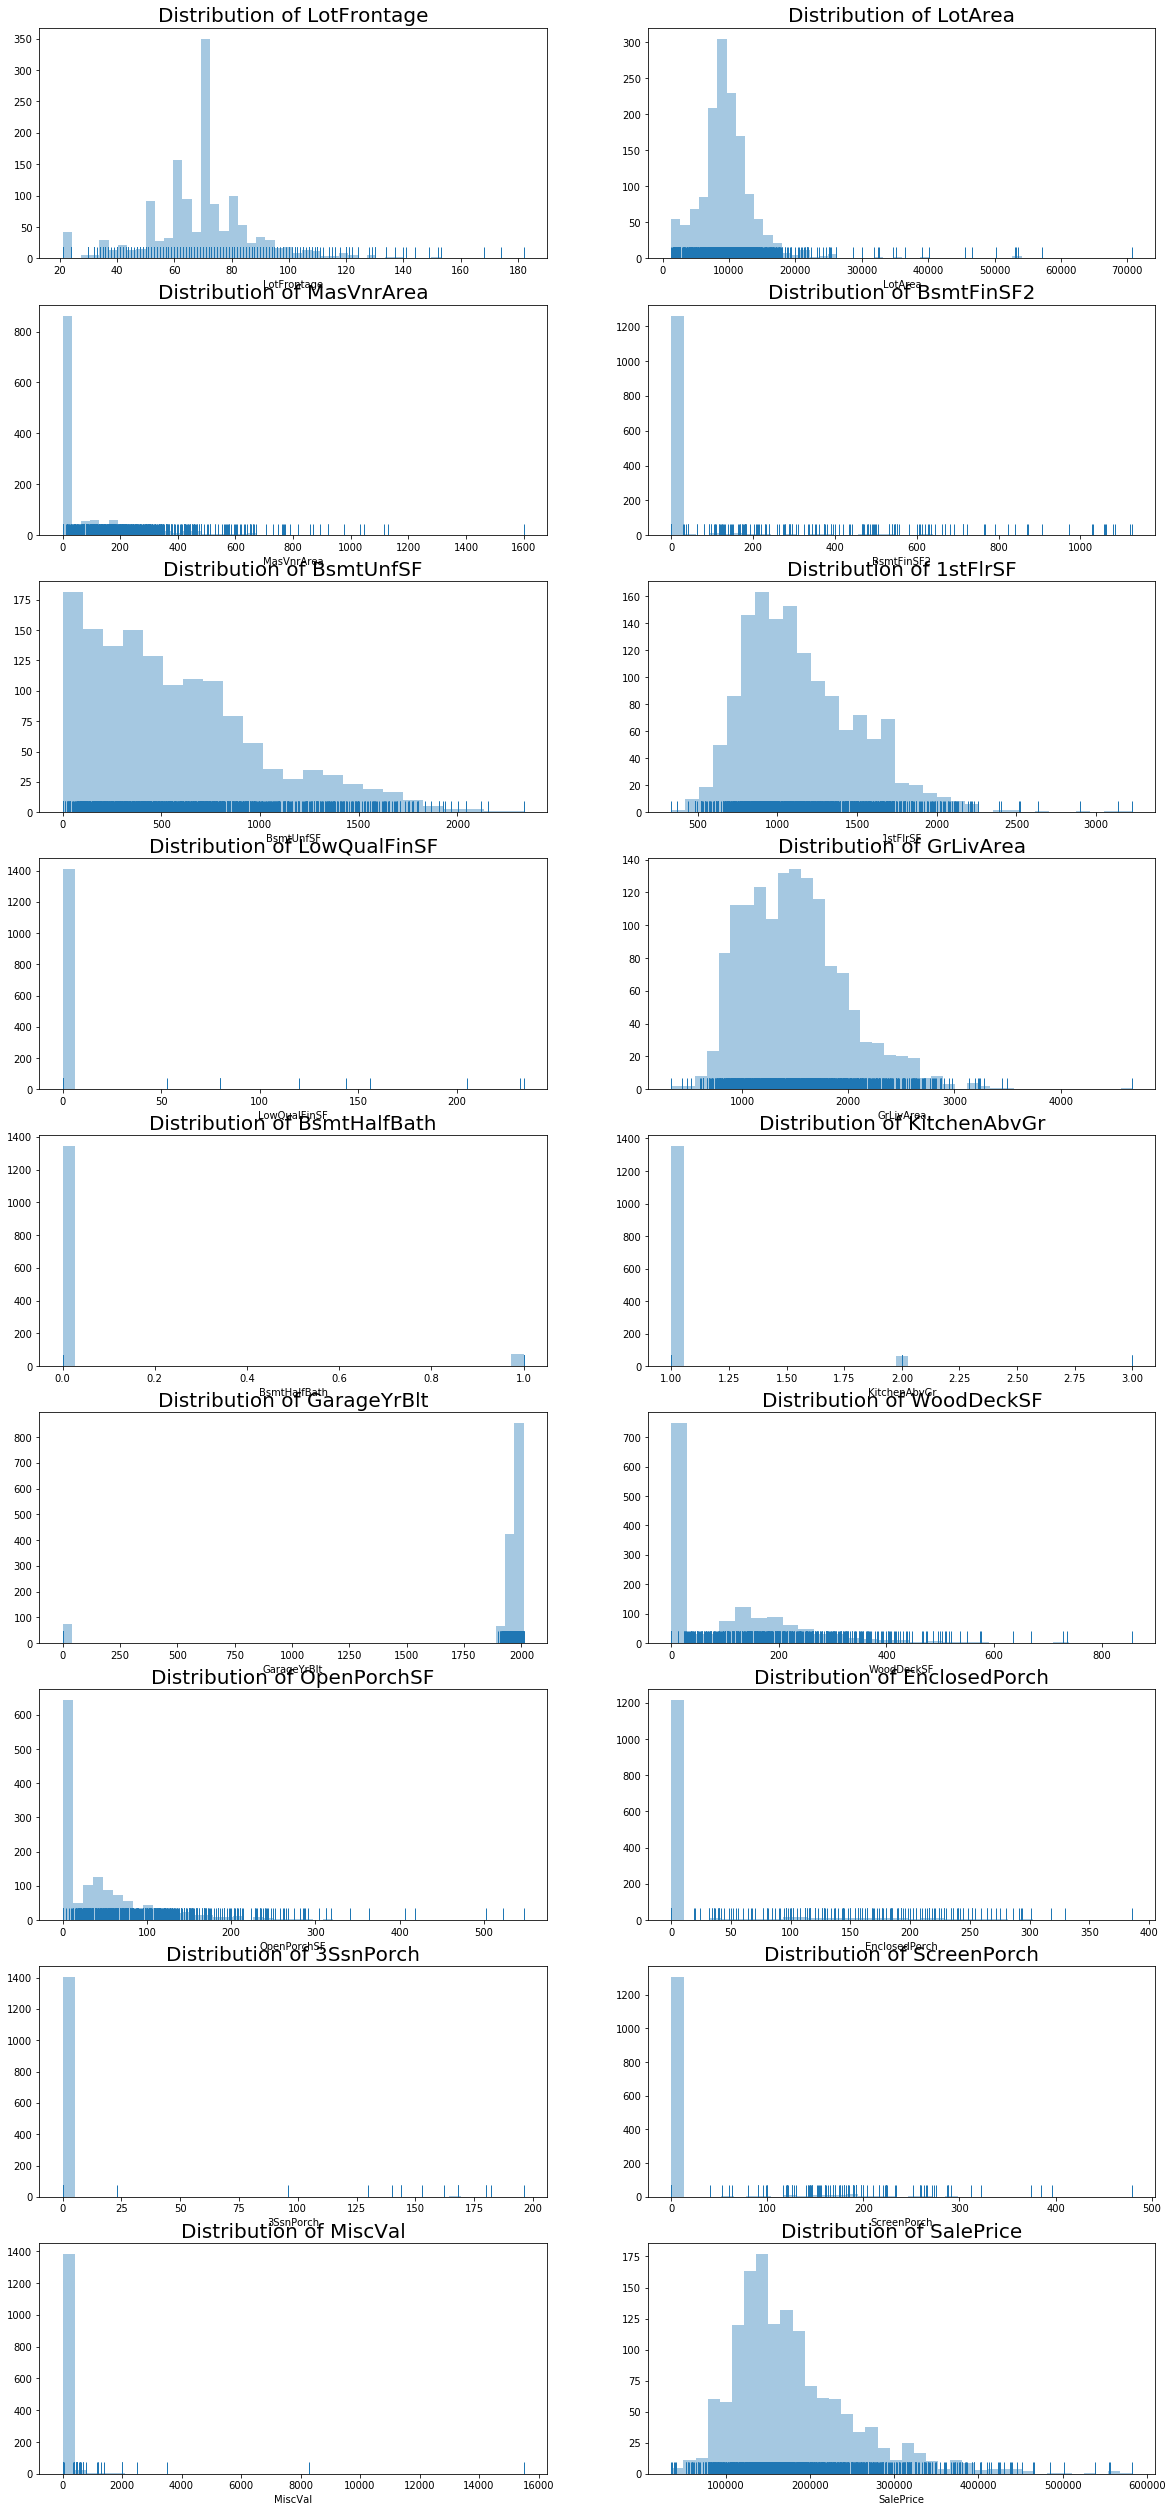

In [21]:
transform = []
for col in desc[desc['col_type'] == 'Numerical'].index:
    high_skewness, high_kurtosis = skewness_kurtosis_test(data['train'][col])
    
    if high_skewness or high_kurtosis:
        transform.append(col)
 
print('Features found with high skewness or kurtosis: {:,}'.format(len(transform)))
plot_df_features(data['train'][transform])

In [22]:
def transform_feature(df, transform):
    """transforming skewed data by using log(x+1), 
        using x+1 to avoid divide by zero issues
    """
    for col in transform:
        try:
            print('log transformed: {}'.format(col))
            df[col] = np.log1p(df[col])
        except:
            print('could not transform: {}'.format(col))
            
# make a copy of the numerical data
cols = list(desc[desc['col_type'] == 'Numerical'].index)
num_train = data['train'][cols].copy()

transform_feature(num_train, transform)

log transformed: LotFrontage
log transformed: LotArea
log transformed: MasVnrArea
log transformed: BsmtFinSF2
log transformed: BsmtUnfSF
log transformed: 1stFlrSF
log transformed: LowQualFinSF
log transformed: GrLivArea
log transformed: BsmtHalfBath
log transformed: KitchenAbvGr
log transformed: GarageYrBlt
log transformed: WoodDeckSF
log transformed: OpenPorchSF
log transformed: EnclosedPorch
log transformed: 3SsnPorch
log transformed: ScreenPorch
log transformed: MiscVal
log transformed: SalePrice


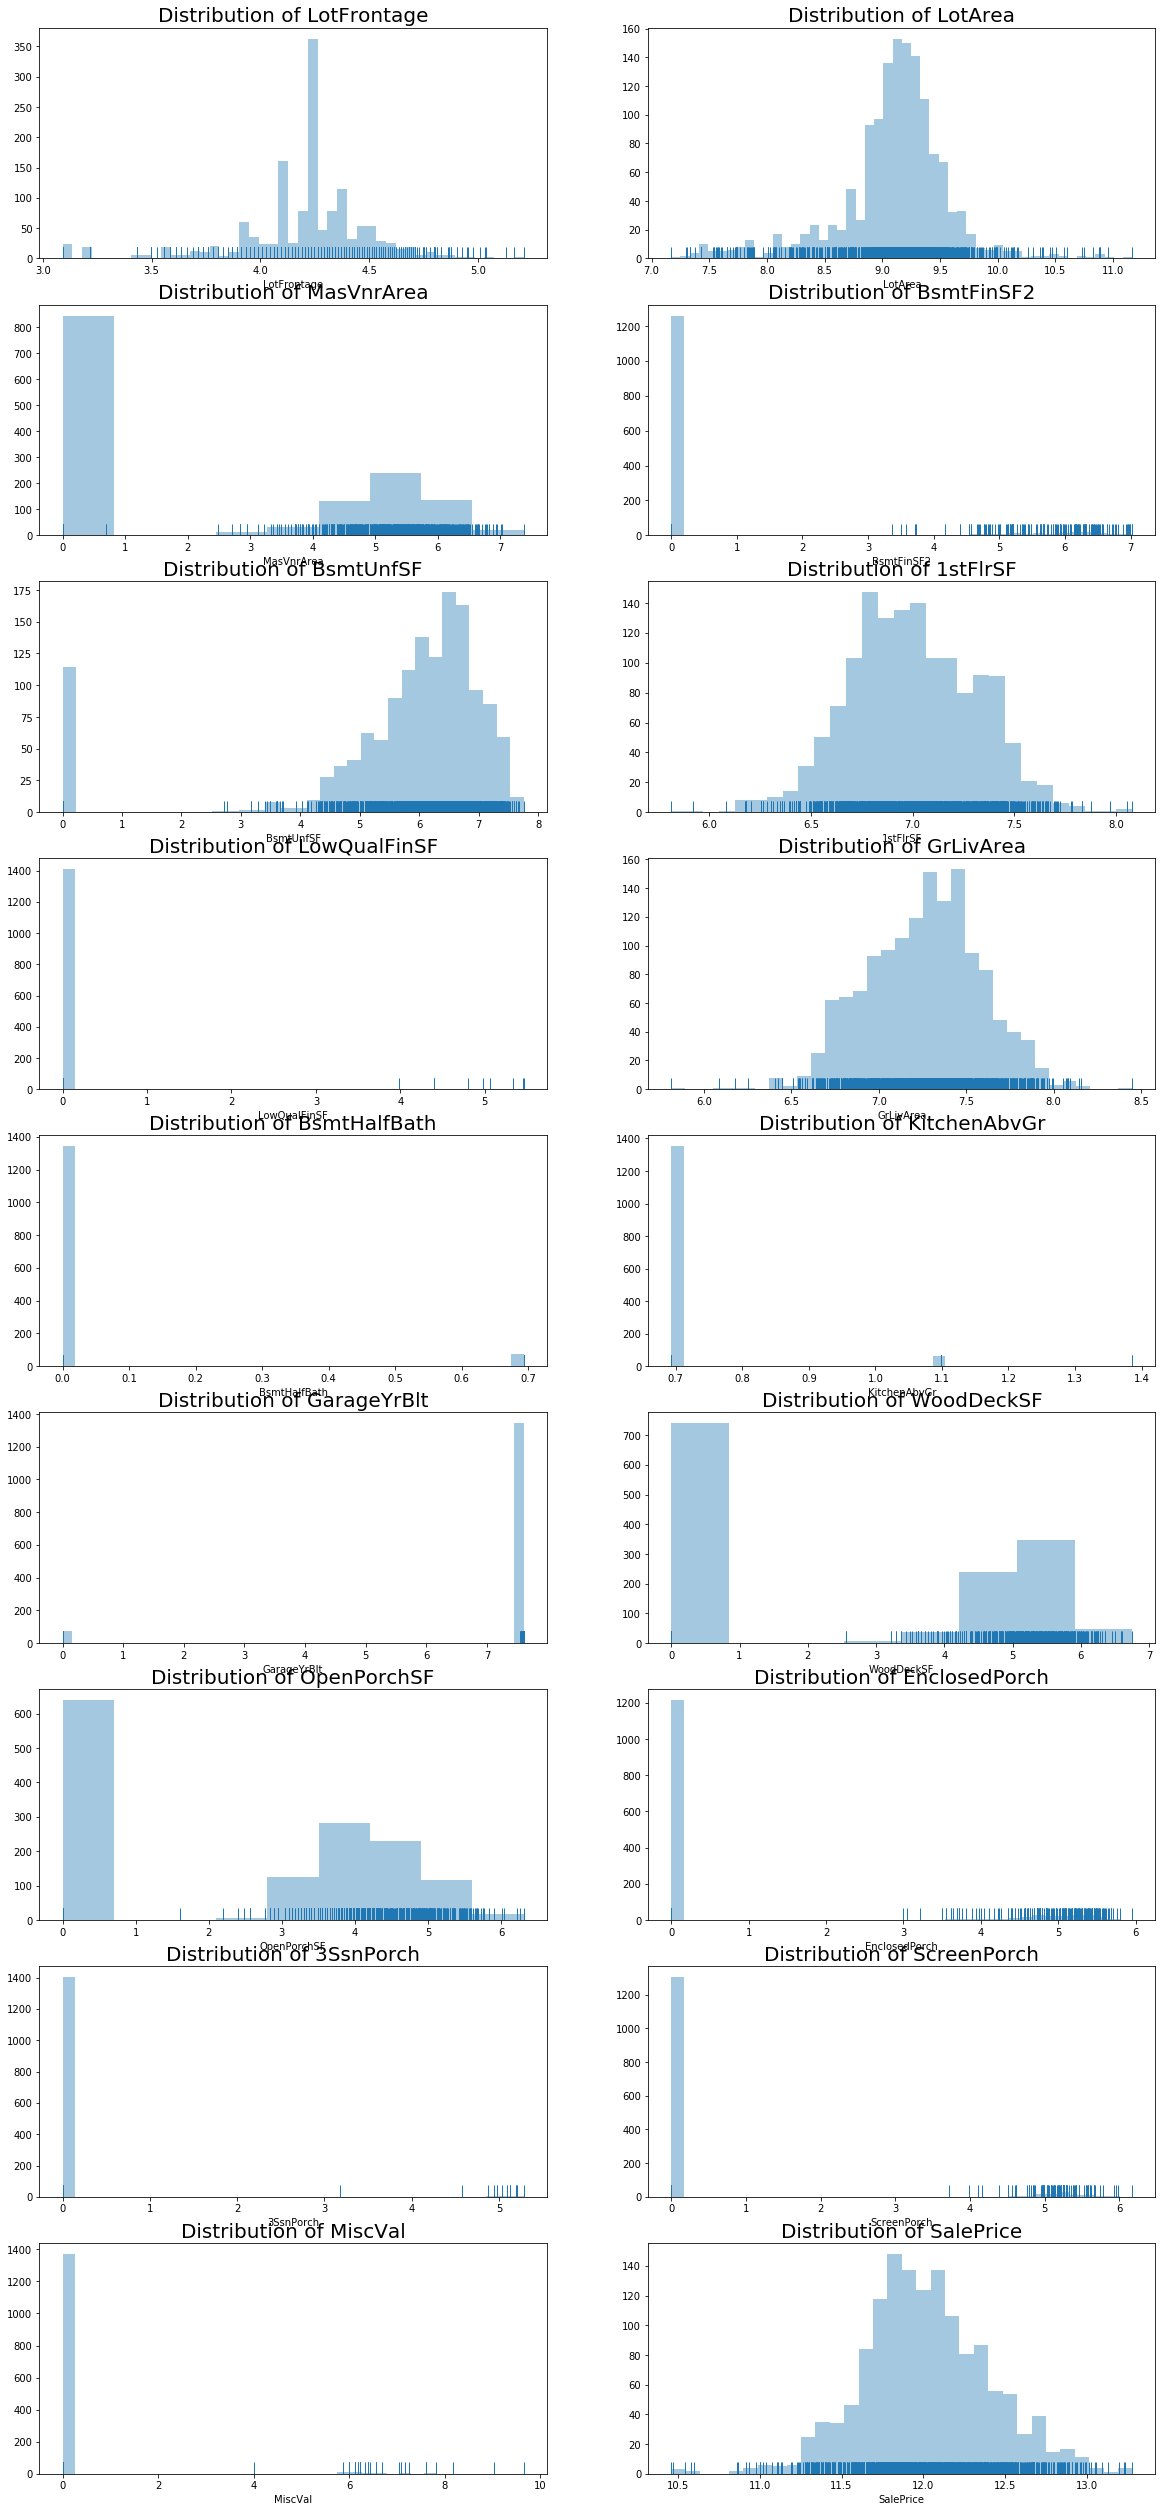

In [23]:
# check plots after transform
plot_df_features(num_train[transform])

### Categorical Features
Convert categorical data by using one-hot encoding, and creating dummy variables

In [24]:
cat_cols = list(desc[desc['col_type'] == 'Categorical'].index)
onehot_train = pd.get_dummies(data['train'][cat_cols], prefix=cat_cols)

In [25]:
# concat transformed numerical and categorical data into training data set
X_train = pd.concat([num_train, onehot_train], axis=1)
X_train.drop(['Id', 'SalePrice'], axis=1, inplace=True)

In [26]:
y_train = num_train['SalePrice']

In [27]:
display(X_train)
#display(y_train)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,7,5,2003,2003,5.283204,706,0.000000,5.017280,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,6,8,1976,1976,0.000000,978,0.000000,5.652489,...,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,7,5,2001,2002,5.093750,486,0.000000,6.075346,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,7,5,1915,1970,0.000000,216,0.000000,6.293419,...,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,8,5,2000,2000,5.860786,655,0.000000,6.196444,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.143135,8.976894,6,5,1999,2000,0.000000,0,0.000000,6.860664,...,0,0,0,1,0,0,0,0,1,0
1456,4.454347,9.486152,6,6,1978,1988,4.787492,790,5.099866,6.380123,...,0,0,0,1,0,0,0,0,1,0
1457,4.204693,9.109746,7,9,1941,2006,0.000000,275,0.000000,6.777647,...,0,0,0,1,0,0,0,0,1,0
1458,4.234107,9.181735,5,6,1950,1996,0.000000,49,6.937314,0.000000,...,0,0,0,1,0,0,0,0,1,0


### Model training

Starting simple by using the standard **Elastic Net** regression model, which is a mixture of **L1 penalty (Lasso)** & **L2 penalty (Ridge)** regularisation.
This will give us a base line for comparison.

* **Lasso** - Gives sparse solutions (simplier to compute), by reducing the coefficients to zero of highly correlated variables, except one choosen random
* **Ridge** - Prevents overfitting, by keeping all the coefficients of highly correlated variables, spreading the values across all variables coefficients

In [28]:
def model_cv_score(model, X, y, kfolds=5):
    """ Cross-Validation RMSE Score
    """
    cv_scores = {}
    kf = KFold(n_splits=kfolds, shuffle=True)
    
    for i, (train_idx, test_idx) in enumerate(kf.split(X)):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        
        # predict y
        y_pred = model.predict(X.iloc[test_idx])
        
        rmse = np.sqrt(mean_squared_error(y.iloc[test_idx], y_pred))
        
        cv_scores['split_RMSE_{}'.format(i)] = rmse
    
    cv_scores['mean_RMSE'] = np.mean(list(cv_scores.values()))
    cv_scores['std_RMSE'] = np.std(list(cv_scores.values()))
    
    return cv_scores

def elastic_net_grid_search(param_grid, X, y):
    """ Hyper parameter tuning for the ElasticNet model,
        using a cross-validation grid search
    """
    t0 = time.time()

    gs_results = []
    
    combinations = itertools.product(*(param_grid[key] for key in param_grid.keys()))
    # all combinations of parametes
    for comb in combinations:
        params = dict(zip(param_grid.keys(), comb))
        
        # define regression model
        reg = ElasticNet(**params)
        
        scores = {'params': params}
        scores.update(model_cv_score(reg, X, y))
        gs_results.append(scores)
    
    print('grid search runtime: {}s'.format(time.time() - t0))
    
    return pd.DataFrame(gs_results).sort_values('mean_RMSE')

In [29]:
# start grid-search
elasticnet_parameters = {
    'alpha': [1, 0.5, 0.1, 0.01, 0.001],
    'l1_ratio': [0.01, 0.25, 0.5, 0.75, 1]
}

grid_search = elastic_net_grid_search(elasticnet_parameters, X_train.fillna(0), y_train)

grid search runtime: 2.259584426879883s


In [30]:
display(grid_search.head(10))

,params,split_RMSE_0,split_RMSE_1,split_RMSE_2,split_RMSE_3,split_RMSE_4,mean_RMSE,std_RMSE
22,"{'alpha': 0.001, 'l1_ratio': 0.5}",0.142621,0.115981,0.101646,0.117616,0.087881,0.113149,0.016670
21,"{'alpha': 0.001, 'l1_ratio': 0.25}",0.111418,0.116158,0.136647,0.095883,0.117559,0.115533,0.011926
23,"{'alpha': 0.001, 'l1_ratio': 0.75}",0.119592,0.113284,0.108459,0.136283,0.102788,0.116081,0.010513
15,"{'alpha': 0.01, 'l1_ratio': 0.01}",0.103562,0.104285,0.142171,0.130102,0.100381,0.116100,0.015382
20,"{'alpha': 0.001, 'l1_ratio': 0.01}",0.115043,0.118166,0.112113,0.122521,0.124806,0.118530,0.004258
24,"{'alpha': 0.001, 'l1_ratio': 1}",0.132653,0.102537,0.140726,0.113336,0.104979,0.118846,0.013892
10,"{'alpha': 0.1, 'l1_ratio': 0.01}",0.144155,0.105030,0.135360,0.119698,0.134103,0.127669,0.012572
16,"{'alpha': 0.01, 'l1_ratio': 0.25}",0.105713,0.112194,0.121845,0.168088,0.132354,0.128039,0.020043
17,"{'alpha': 0.01, 'l1_ratio': 0.5}",0.133363,0.141863,0.130893,0.149689,0.121954,0.135552,0.008671
18,"{'alpha': 0.01, 'l1_ratio': 0.75}",0.147926,0.123821,0.135395,0.135541,0.158490,0.140235,0.010857


In [31]:
# selecting the top set of parameters
params = grid_search.iloc[0]['params']
reg = ElasticNet(**params)
reg.fit(X_train, y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

### Review the model

Features with zero coefficient: 193 (61.86%)


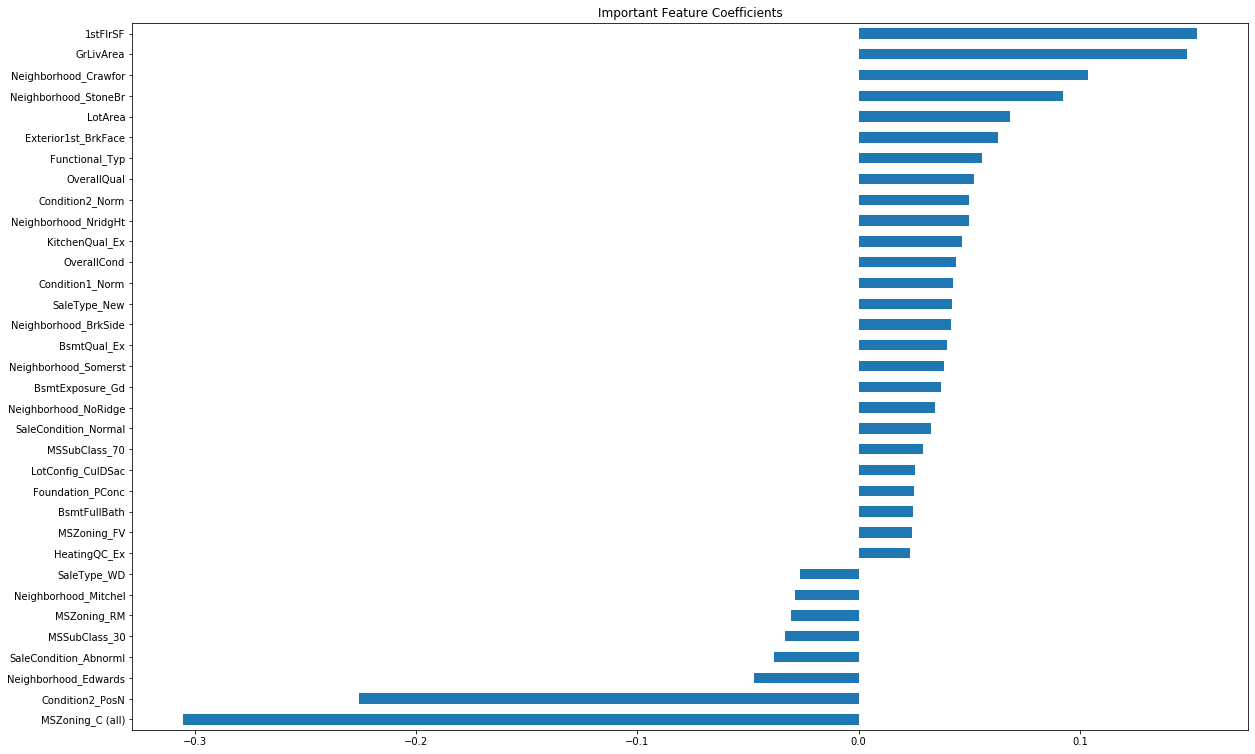

In [32]:
feature_coef = pd.Series(reg.coef_, index=X_train.columns).sort_values()

# have no effect on the prediction
zero_coef = feature_coef[feature_coef == 0]
print('Features with zero coefficient: {} ({:.2f}%)'.format(len(zero_coef), (len(zero_coef)/len(feature_coef))*100))

# mean of non-zero coefficients
coef_mean = np.mean(abs(feature_coef[feature_coef != 0]))

# plot |coefficients| >= the mean
important_coef = feature_coef[abs(feature_coef) >= coef_mean]
fig = plt.figure(figsize=(20, 13))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Important Feature Coefficients')
important_coef.plot(kind='barh', ax=ax)

Running the training data through the model to see how well it predicts the true values

In [33]:
def predict_values(X, reg):
    """ make prediction and converts back into a price"""

    y_pred_trans = reg.predict(X)
    y_pred = np.exp(y_pred_trans)-1
    
    return y_pred

In [34]:
def prepare_prediction_data(df, X_train_columns):
    # description of test
    desc_prep = data_description(df)

    # fill in missing test data
    missing_df = missing_data(df, desc_prep)
    fill_missing(df, missing_df)
    display(missing_df)

    cat_cols = list(desc_prep[desc_prep['col_type'] == 'Categorical'].index)
    onehot_df = pd.get_dummies(df[cat_cols], prefix=cat_cols)

    num_cols = list(desc_prep[desc_prep['col_type'] == 'Numerical'].index)
    num_df = df[num_cols].copy()
    num_df.drop(['Id'], axis=1, inplace=True)
    transform_feature(num_df, transform)

    # concat transformed numerical and categorical data into training data set
    X = pd.concat([num_df, onehot_df], axis=1)

    # mismatch due to different category in the test to the train
    # that create unseen columns (to the model) during one-hot encoding 
    train_cols = list(X_train_columns)
    X_cols  = list(X.columns)

    select = [col for col in train_cols if col in X_cols]
    create = [col for col in train_cols if col not in X_cols]

    X = X[select]
    for col in create:
        X[col] = 0
        
    return X[train_cols]

In [35]:
# make prediction on the unfilter train data
X_train_copy = prepare_prediction_data(data['train_copy'], X_train.columns)

data has 0 columns with missing data


,missing,percent,col_type,data_type


log transformed: LotFrontage
log transformed: LotArea
log transformed: MasVnrArea
log transformed: BsmtFinSF2
log transformed: BsmtUnfSF
log transformed: 1stFlrSF
log transformed: LowQualFinSF
log transformed: GrLivArea
log transformed: BsmtHalfBath
log transformed: KitchenAbvGr
log transformed: GarageYrBlt
log transformed: WoodDeckSF
log transformed: OpenPorchSF
log transformed: EnclosedPorch
log transformed: 3SsnPorch
log transformed: ScreenPorch
log transformed: MiscVal
log transformed: SalePrice


In [36]:
results = data['train_copy'][['Id', 'SalePrice']].copy()
results['predicted_SalePrice'] = predict_values(X_train_copy, reg)
results['difference'] = results['predicted_SalePrice'] - results['SalePrice']

display(results.head())

,Id,SalePrice,predicted_SalePrice,difference
0,1,208500,206003.605787,-2496.394213
1,2,181500,192809.498654,11309.498654
2,3,223500,215222.978138,-8277.021862
3,4,140000,173187.528340,33187.528340
4,5,250000,289494.448113,39494.448113


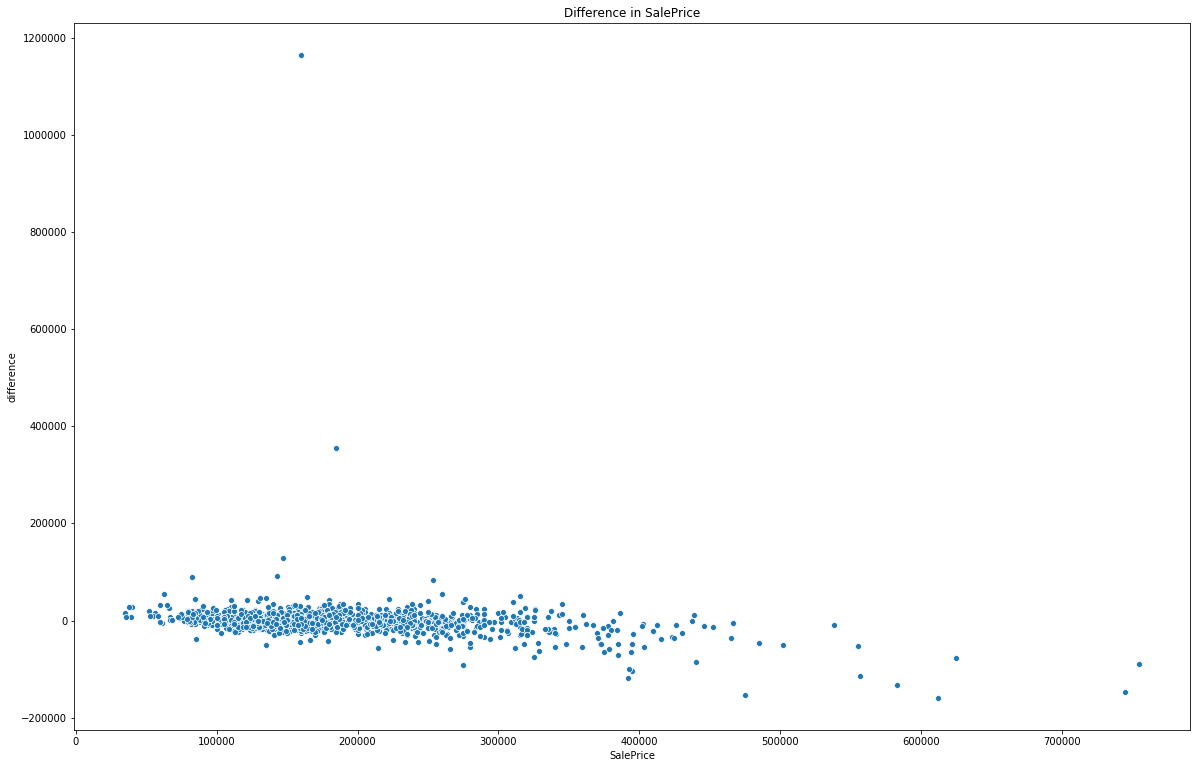

In [37]:
fig = plt.figure(figsize=(20, 13))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Difference in SalePrice')
sns.scatterplot(x='SalePrice', y='difference', data=results, ax=ax)

Plot the results of the unfilter training data through the model. Most results only have slight diffences, but a clear outlier in the predictions can be seen with a price difference of over 1,000,000.

And the model seem to predict a value below their sale price for more expensive property.

In [38]:
# bad predictions
results[results['difference'] > 50000]

,Id,SalePrice,predicted_SalePrice,difference
318,319,260000,3.152624e+05,5.526242e+04
462,463,62383,1.160506e+05,5.366765e+04
523,524,184750,5.395563e+05,3.548063e+05
581,582,253293,3.358195e+05,8.252647e+04
588,589,143000,2.338955e+05,9.089549e+04
632,633,82500,1.713038e+05,8.880380e+04
1298,1299,160000,1.323514e+06,1.163514e+06
1324,1325,147000,2.756061e+05,1.286061e+05
1359,1360,315000,3.663282e+05,5.132819e+04


The above bad prediction could be use to understand where the weakests are within the model

### Test prediction

In [39]:
X_test = prepare_prediction_data(data['test'], X_train.columns)

data has 33 columns with missing data


,missing,percent,col_type,data_type
PoolQC,1456,0.997944,Categorical,object
MiscFeature,1408,0.965045,Categorical,object
Alley,1352,0.926662,Categorical,object
Fence,1169,0.801234,Categorical,object
FireplaceQu,730,0.500343,Categorical,object
LotFrontage,227,0.155586,Numerical,float64
GarageYrBlt,78,0.053461,Numerical,float64
GarageCond,78,0.053461,Categorical,object
GarageQual,78,0.053461,Categorical,object
GarageFinish,78,0.053461,Categorical,object


log transformed: LotFrontage
log transformed: LotArea
log transformed: MasVnrArea
log transformed: BsmtFinSF2
log transformed: BsmtUnfSF
log transformed: 1stFlrSF
log transformed: LowQualFinSF
log transformed: GrLivArea
log transformed: BsmtHalfBath
log transformed: KitchenAbvGr
log transformed: GarageYrBlt
log transformed: WoodDeckSF
log transformed: OpenPorchSF
log transformed: EnclosedPorch
log transformed: 3SsnPorch
log transformed: ScreenPorch
log transformed: MiscVal
log transformed: SalePrice
could not transform: SalePrice


In [40]:
# convert prediction back into a price
y_pred_test = predict_values(X_test, reg)
predictions = pd.Series(y_pred_test, index=data['test']['Id'], name='SalePrice').to_frame()

In [41]:
# save test predictions
fname = 'test_predictions.csv'
create_directory(OUTPUT_DIR)
fpath = os.path.join(OUTPUT_DIR, fname)

predictions.to_csv(fpath)

display(predictions.head())

,SalePrice
Id,
1461,122778.045263
1462,156679.859640
1463,181723.553105
1464,200593.769120
1465,198653.933902


Compare the test prediction to the true values, to check they have similar distributions

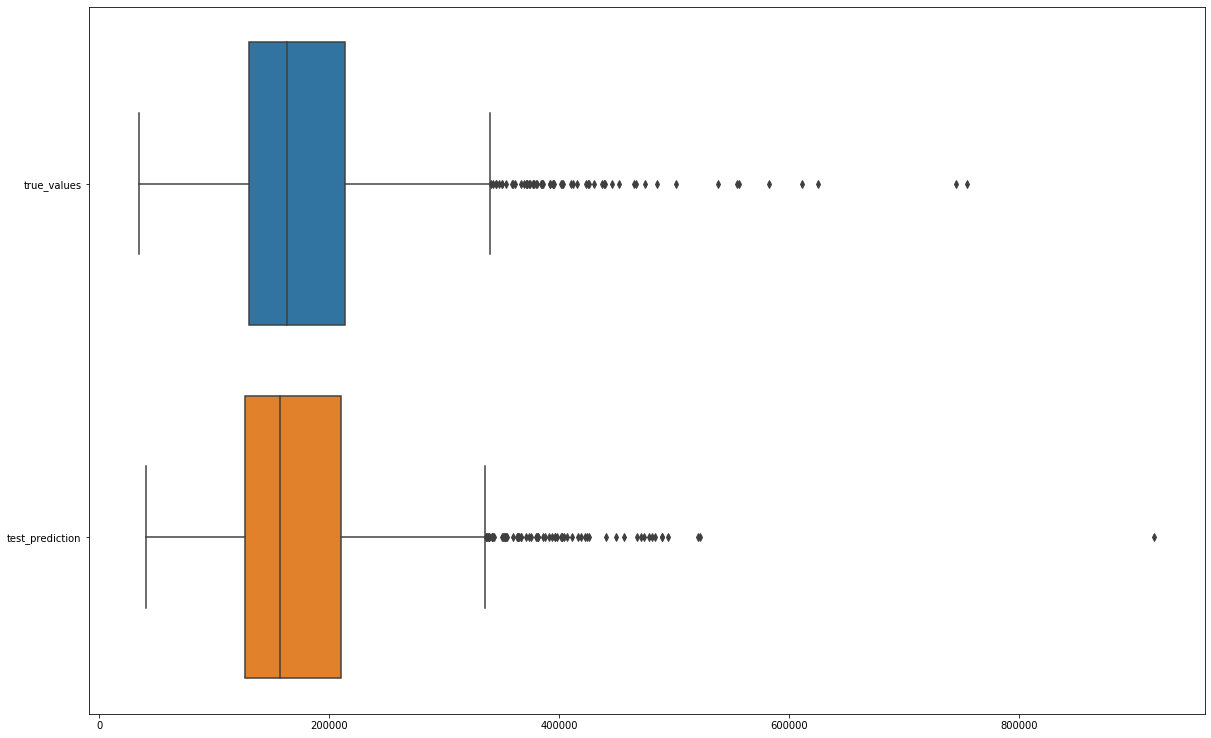

In [42]:
both_df = pd.DataFrame()
both_df['true_values'] = results['SalePrice']
both_df['test_prediction'] = list(predictions['SalePrice']) + [np.nan]

fig = plt.figure(figsize=(20, 13))
ax = fig.add_subplot(1, 1, 1)
ax = sns.boxplot(data=both_df, orient='h')

### Model comparison

Using simple model setup, taken from example <https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html#sphx-glr-auto-examples-ensemble-plot-voting-regressor-py>

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

In [44]:
comparisons = []

reg_en = ElasticNet()
reg_gb = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg_rf = RandomForestRegressor(random_state=1, n_estimators=10)
reg_lr = LinearRegression()
reg_v = VotingRegressor([('gb', reg_gb), ('rf', reg_rf), ('lr', reg_lr)])

models = {
    'Tuned ElasticNet (my model)': reg,
    'ElasticNet': reg_en,
    'GradientBoosting': reg_gb,
    'RandomForest': reg_rf,
    'LinearRegression': reg_lr,
    'VotingRegression':reg_v
}

for name, model in models.items():
    print(name)
    scores = {'model': name}
    scores.update(model_cv_score(model, X_train, y_train))
    
    comparisons.append(scores)

compare_df = pd.DataFrame(comparisons).sort_values('mean_RMSE')
display(compare_df)

Tuned ElasticNet (my model)
ElasticNet
GradientBoosting
RandomForest
LinearRegression
VotingRegression


,model,split_RMSE_0,split_RMSE_1,split_RMSE_2,split_RMSE_3,split_RMSE_4,mean_RMSE,std_RMSE
0,Tuned ElasticNet (my model),0.108274,0.094404,0.141495,0.109552,0.122482,0.115242,0.014473
4,LinearRegression,0.105151,0.108314,0.108497,0.156808,0.158996,0.127553,0.022656
5,VotingRegression,0.148841,0.125320,0.155966,0.151223,0.124105,0.141091,0.012391
3,RandomForest,0.154436,0.159770,0.134672,0.165645,0.133660,0.149637,0.011981
1,ElasticNet,0.202203,0.182026,0.187652,0.174624,0.177441,0.184789,0.008910
2,GradientBoosting,0.237787,0.222810,0.230494,0.216665,0.219407,0.225433,0.007051


---
## Conclusion

Hopefully the exploratory data analysis section of this notebook helps to shows the structures, types, outlier, missing points of the data.

The regression section builds a basic framework to demonstrate the training and tuning of a simple scikit learn model, with evaluation metrics. It is now easy to take this techniques and apply more  model, if the goal is to increase prediction accuracy.

With a deep understanding of the features further feature engineering can be done to give the model help with selecting important feature and removing other.

# Thanks for your time

In [45]:
# # option to round to nearest
# nearest = False
# if nearest:
#     increment = 1000
#     results['predicted_SalePrice'] = [int(round(val/increment)*increment) for val in results['predicted_SalePrice']]